<a href="https://colab.research.google.com/github/hanialsab3/ZAKA-AI/blob/main/ZAKA_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


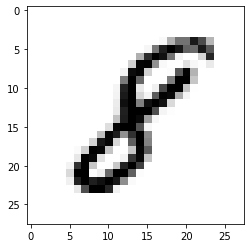

In [5]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [10]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3573 - accuracy: 0.8959
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0842 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0593 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0411 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0312 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0208 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0176 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [12]:

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0628 - accuracy: 0.9844


[0.06278117001056671, 0.9843999743461609]

7


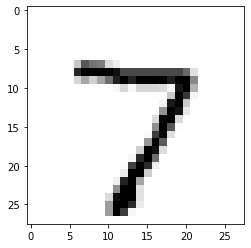

In [19]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())